## Linear Regression

Linear regression assumes that features and outcomes satisfy a linear relationship. The expressive ability of linear relationship is strong. The influence of each feature on the result can be reflected by its parameter. 

And each feature variable can be mapped to a function first, and then participate in the linear calculation. In this way, a nonlinear relationship between features and results can be expressed.

The linear model can be expressed as $f(X)=W^{T}X+b$ 

$b$ (bias parameter): compensates for the difference between the mean of the target values and the weighted mean of the basis function values

The goal is that the predicted value from model can be infinitely close to the true value: $f(x_{i}) \approx y_{i}$  

The reason for we want infinitely close but not exactly the same is that we can only learn part of the data sampled from all the data of a certain type of event, the sampled data cannot cover all the possibilities of the event, so we can only learn the overall law in the end.

In [1]:
import numpy as np

In [2]:
def initialize_params(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

Here we use MSE to measure the difference between $\hat{y}$ and $y$: $\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^{n}\left(f(x_{i})-y_{i}\right)^{2}=\frac{1}{n} \sum_{i=1}^{n}\left(\hat{y}_{i}-y_{i}\right)^{2}$

The difference can be positive or negative so using square can erase the effect of positive and negative. After the square is used, the error out of -1 and 1 will be enlarged, and the error between -1 and 1 will be reduced at the same time. And it's unable to handle when measures vary widely across dimensions, so we have to normalize the data before modeling.

Derivation Process of Parameter Estimation in Linear Regression Model:

$\left(w^{*}, b^{*}\right) =\underset{(w, b)}{\arg \min } \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2} =\underset{(w, b)}{\arg \min } \sum_{i=1}^{m}\left(y_{i}-w x_{i}-b\right)^{2}$

$\frac{\partial E_{(w, b)}}{\partial w}=2\left(w \sum_{i=1}^{m} x_{i}^{2}-\sum_{i=1}^{m}\left(y_{i}-b\right) x_{i}\right), \quad$
$\frac{\partial E_{(w, b)}}{\partial b}=2\left(m b-\sum_{i=1}^{m}\left(y_{i}-w x_{i}\right)\right)$

$w=\frac{\sum_{i=1}^{m} y_{i}\left(x_{i}-\bar{x}\right)}{\sum_{i=1}^{m} x_{i}^{2}-\frac{1}{m}\left(\sum_{i=1}^{m} x_{i}\right)^{2}}, \quad$
$b=\frac{1}{m} \sum_{i=1}^{m}\left(y_{i}-w x_{i}\right)$

In matrix:

$w^{\prime} = 2X^{T}(Y-Xw) = 2X^{T}Y-2X^{T}Xw = 0$

$2X^{T}Y = 2X^{T}Xw \rightarrow \hat{w} = (X^{T}X)^{-1}X^{T}Y$

$X^{T}X$ usually isn't a full-rank matrix in reality so we need to apply regularization on it

$\hat{w} = (X^{T}X+ \lambda I)^{-1}X^{T}Y$



In [3]:
def linear_loss(X, y, w, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    # model function
    y_hat = np.dot(X, w) + b
    # loss function
    loss = np.sum((y_hat-y)**2) / num_train
    # partial derivatives of parameters
    dw = np.dot(X.T, (y_hat-y)) / num_train
    db = np.sum((y_hat-y)) / num_train
    return y_hat, loss, dw, db

Update parameters based on gradient descent: multiple iterations are required to converge to the global minimum and a proper learning rate is necessary, but under this method, $(X^{T}X)^{-1}$ isn't required to be calculated.

In [4]:
def linear_train(X, y, learning_rate, epochs):
    w, b = initialize_params(X.shape[1])
    loss_list = []
    for i in range(1, epochs):
        # calculate the current estimation, loss, and partial derivatives
        y_hat, loss, dw, db = linear_loss(X, y, w ,b)
        loss_list.append(loss)
        # update parameters based on gradient descent
        w += -learning_rate * dw
        b += -learning_rate * db

        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))

        # save parameters
        params = {'w':w, 'b':b}
        # save gradient
        grads = {'dw':dw, 'db':db}

    return loss_list, loss, params, grads

In [5]:
from sklearn.datasets import load_diabetes 
from sklearn.utils import shuffle

diabetes = load_diabetes() 
data = diabetes.data 
target = diabetes.target

In [6]:
# shuffle the data
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)

In [7]:
# divide the train and test data set
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape) 
print('X_test=', X_test.shape) 
print('y_train=', y_train.shape) 
print('y_test=', y_test.shape)

X_train= (397, 10)
X_test= (45, 10)
y_train= (397, 1)
y_test= (45, 1)


In [8]:
loss_list, loss, params, grads = linear_train(X_train, y_train, 0.001, 100000)

epoch 10000 loss 5533.039734
epoch 20000 loss 5217.582409
epoch 30000 loss 4949.676466
epoch 40000 loss 4721.504031
epoch 50000 loss 4526.567333
epoch 60000 loss 4359.463960
epoch 70000 loss 4215.700505
epoch 80000 loss 4091.538010
epoch 90000 loss 3983.863771


In [9]:
# check the parameters of regression model
print(params)

{'w': array([[  44.07229775],
       [  -6.99872355],
       [ 157.0665895 ],
       [ 118.32921584],
       [  37.47920655],
       [  24.97681831],
       [-104.31188822],
       [ 104.03504877],
       [ 148.85521477],
       [  94.07047013]]), 'b': 151.57222424703687}


In [10]:
# predict the test result
def predict(X, params): 
    w = params['w']
    b = params['b']
    y_pred = np.dot(X, w) + b 
    return y_pred
    
y_pred = predict(X_test, params) 
y_pred[:5]

array([[132.02545017],
       [141.77423134],
       [150.48352021],
       [128.48666753],
       [147.29312454]])

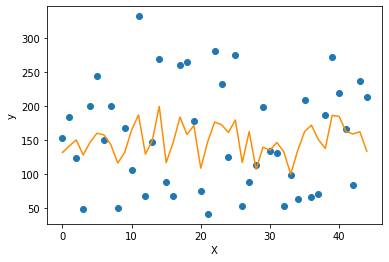

In [12]:
# visualize the prediction and real test result
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']
plt.scatter(range(X_test.shape[0]), y_test) 
plt.plot(f, color = 'darkorange') 
plt.xlabel('X')
plt.ylabel('y')
plt.show()

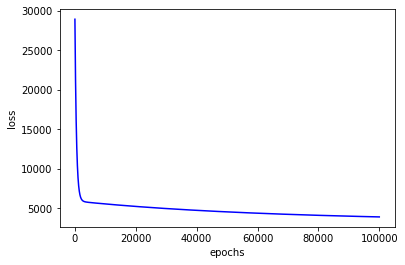

In [13]:
# plot the loss during training
plt.plot(loss_list, color = 'blue') 
plt.xlabel('epochs') 
plt.ylabel('loss')
plt.show()